<a href="https://colab.research.google.com/github/waraporn19/KKU_data_mining/blob/master/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from datetime import date,datetime

## ข้อมูลผู้ป่วยCovid

In [ ]:
covid = pd.read_csv('/content/drive/MyDrive/dataviz_2021_data/covid19cases (2).csv')
covid

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
57505,57506,26/4/2021,25/4/2021,ชาย,51.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN
57506,57507,26/4/2021,25/4/2021,ชาย,50.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN
57507,57508,26/4/2021,25/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN
57508,57509,26/4/2021,25/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN


In [ ]:
covid['announce_date']  = pd.to_datetime(covid['announce_date'],format='%d/%m/%Y')

In [ ]:
covid = covid.set_index("announce_date")
covid_Total = covid.resample('M').count()

In [ ]:
covid_All  = covid_Total[covid_Total.columns[covid_Total.columns == 'No.']] #จำนวนผู้ป่วยที่ติดCovid ในแต่ละเดือน
covid_All

,No.
announce_date,
2020-01-31,19
2020-02-29,23
2020-03-31,1609
2020-04-30,1303
2020-05-31,127
2020-06-30,90
2020-07-31,139
2020-08-31,102
2020-09-30,152


In [ ]:
covid_All=covid_All.rename(columns = {'No.':'Patient totals'})
covid_All

,Patient totals
announce_date,
2020-01-31,19
2020-02-29,23
2020-03-31,1609
2020-04-30,1303
2020-05-31,127
2020-06-30,90
2020-07-31,139
2020-08-31,102
2020-09-30,152


# ข้อมูลประชาชนที่เดินทาง

In [ ]:
passenger = pd.read_excel("/content/drive/MyDrive/dataviz_2021_data/passenger-covid19.xlsx",sheet_name=3,skiprows=1,skipfooter=33)
passenger

,Unnamed: 0,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
0,ทางถนน (คน),1483255,1705026,1752572,1576146,1565134,1746239,1730243,1721777,1698594,1727356,1522765,1511236,1683606,1691301,1727613,1676901,1732040,1556750,1511356,1718946,1710079,1678182,1685422,1658692,1523835,1498975,1696898,1679988,1668462,1640721,1704546,1400174,1483074,1706497,1731697,1727513,1662866,1746742,1505635,...,997062,1017447,849673,787616,937505,969454,958065,981683,1011976,877911,794001,974571,965117,967022,987469,1006485,868194,789312,965421,753176,908431,936938,929038,719618,555680,578184,424539,454352,479063,596596,540688,507339,695769,665925,648848,631892,635830,516751,425707,580580
1,ทางราง (คน),885353,1269207,1366412,1027281,915425,1479971,1496915,1496873,1525899,1630428,1192917,988051,1479502,1491002,1502596,1507477,1599647,1169227,983700,1495196,1497279,1488097,1497174,1527329,1116084,938763,1420125,1457240,1440515,1464619,1597290,1097787,940562,1452349,1437693,1463069,1465400,1589959,1036116,...,984873,1033094,690769,544737,961659,986118,994193,1007277,1083825,730040,583999,1002307,1008957,1039196,1037660,1109747,726174,537800,986006,586488,932517,830224,792450,430863,303809,396526,235614,227986,245450,421863,303925,260010,520387,488979,475030,467490,474554,289943,223384,418835
2,ทางน้ำ (คน),272578,291990,301260,271171,254176,281785,275127,253550,263139,280283,243767,246025,276490,276916,253897,252473,281743,251052,227983,293441,278167,267105,266393,281291,257999,246371,269399,270801,253640,257520,264406,220866,231707,264747,259426,262889,257261,268799,234187,...,85762,126155,81959,86020,90290,109277,78491,88408,88934,85300,79325,107145,95217,91676,84888,81193,115793,106230,100081,83620,116425,105530,118869,163296,169357,167760,182536,166326,150923,108396,103610,73357,77813,69035,66006,60186,54870,48885,42733,53591
3,ทางอากาศ* (คน),102678,104613,100575,100852,100784,98456,98722,96142,98749,101348,93156,99755,99229,98052,98970,103727,106000,103356,105954,105424,100735,101432,104623,103697,101563,103158,103498,98451,95555,95849,97556,90402,89533,88154,85779,88266,93860,99445,94944,...,51244,65243,57665,64944,59144,51341,53670,59380,67960,63406,72844,66721,56866,57980,70353,77529,76062,80447,73958,77376,74769,79717,75900,69100,59960,51998,47717,48945,49859,44204,43157,45917,29483,25390,18141,16139,15365,13702,16622,13585
4,รวมประชาชนเดินทาง (คน),2743864,3370836,3520819,2975450,2835519,3606451,3601007,3568342,3586381,3739415,3052605,28450

In [ ]:
passenger.columns

Index([       'Unnamed: 0', 2020-01-01 00:00:00, 2020-01-02 00:00:00,
       2020-01-03 00:00:00, 2020-01-04 00:00:00, 2020-01-05 00:00:00,
       2020-01-06 00:00:00, 2020-01-07 00:00:00, 2020-01-08 00:00:00,
       2020-01-09 00:00:00,
       ...
       2021-04-17 00:00:00, 2021-04-18 00:00:00, 2021-04-19 00:00:00,
       2021-04-20 00:00:00, 2021-04-21 00:00:00, 2021-04-22 00:00:00,
       2021-04-23 00:00:00, 2021-04-24 00:00:00, 2021-04-25 00:00:00,
       2021-04-26 00:00:00],
      dtype='object', length=483)

In [ ]:
passenger_total = passenger.filter(regex='4',axis=0)
passenger_total

,Unnamed: 0,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
4,รวมประชาชนเดินทาง (คน),2743864,3370836,3520819,2975450,2835519,3606451,3601007,3568342,3586381,3739415,3052605,2845067,3538827,3557271,3583076,3540578,3719430,3080385,2828993,3613007,3586260,3534816,3553612,3571009,2999481,2787267,3489920,3506480,3458172,3458709,3663798,2809229,2744876,3511747,3514595,3541737,3479387,3704945,2870882,...,2118941,2241939,1680066,1483317,2048598,2116190,2084419,2136748,2252695,1756657,1530169,2150744,2126157,2155874,2180370,2274954,1786223,1513789,2125466,1500660,2032142,1952409,1916257,1382877,1088806,1194468,890406,897609,925295,1171059,991380,886623,1323452,1249329,1208025,1175707,1180619,869281,708446,1066591


In [ ]:
passenger_total.columns = [i.strftime('%Y-%m-%d') if isinstance(i, datetime) else i for i in passenger_total.columns]
passenger_total.columns

Index(['Unnamed: 0', '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
       ...
       '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20', '2021-04-21',
       '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-25', '2021-04-26'],
      dtype='object', length=483)

In [ ]:
passenger_total_a = passenger_total.T
passenger_total_a

,4
Unnamed: 0,รวมประชาชนเดินทาง (คน)
2020-01-01,2743864
2020-01-02,3370836
2020-01-03,3520819
2020-01-04,2975450
...,...
2021-04-22,1175707
2021-04-23,1180619
2021-04-24,869281
2021-04-25,708446


In [ ]:
passenger_total_b = passenger_total_a.rename(columns=passenger_total_a.iloc[0]).drop(passenger_total_a.index[0])
passenger_total_b

,รวมประชาชนเดินทาง (คน)
2020-01-01,2743864
2020-01-02,3370836
2020-01-03,3520819
2020-01-04,2975450
2020-01-05,2835519
...,...
2021-04-22,1175707
2021-04-23,1180619
2021-04-24,869281
2021-04-25,708446


In [ ]:
passenger_total_b.columns

Index(['รวมประชาชนเดินทาง (คน)'], dtype='object')

# รวมยอดประชาชนเดินทางในแต่ละเดือน

### มกราคม2020




In [ ]:
Jan2020 = passenger_total_b.iloc[:31,:].sum()[0]
Jan2020

104516847.0

### กุมภาพันธ์2020

In [ ]:
Feb2020 = passenger_total_b.iloc[31:60,:].sum()[0]
Feb2020

92564306.0

### มีนาคม2020

In [ ]:
Mar2020 = passenger_total_b.iloc[60:91,:].sum()[0]
Mar2020 

61635890.0

### เมษายน2020

In [ ]:
Apr2020 = passenger_total_b.iloc[91:121,:].sum()[0]
Apr2020 

22653390.0

### พฤษภาคม2020

In [ ]:
May2020 = passenger_total_b.iloc[121:152,:].sum()[0]
May2020 

32569755.0

### มิถุนายน2020

In [ ]:
Jun2020 = passenger_total_b.iloc[152:182,:].sum()[0]
Jun2020 

48464966.0

### กรกฏาคม2020

In [ ]:
Jul2020 = passenger_total_b.iloc[182:213,:].sum()[0]
Jul2020 

62241436.0

### สิงหาคม2020

In [ ]:
Aug2020 = passenger_total_b.iloc[213:244,:].sum()[0]
Aug2020 

67208460.0

### กันยายน2020

In [ ]:
Sep2020 = passenger_total_b.iloc[244:274,:].sum()[0]
Sep2020 

67916587.0

###ตุลาคม2020

In [ ]:
Oct2020 = passenger_total_b.iloc[274:305,:].sum()[0]
Oct2020 

68487852.0

### พฤศจิกายน2020

In [ ]:
Nov2020 = passenger_total_b.iloc[305:335,:].sum()[0]
Nov2020 

68527999.0

### ธันวาคม2020

In [ ]:
Dec2020 = passenger_total_b.iloc[335:366,:].sum()[0]
Dec2020

65242215.0

### มกราคม2021

In [ ]:
Jan2021 = passenger_total_b.iloc[366:397:].sum()[0]
Jan2021

41277722.0

### กุมภาพันธ์2021

In [ ]:
Feb2021 = passenger_total_b.iloc[397:425:].sum()[0]
Feb2021

46950817.0

### มีนาคม2021

In [ ]:
Mar2021 = passenger_total_b.iloc[425:456:].sum()[0]
Mar2021

61514512.0

### เมษายน2021

In [ ]:
Apr2021 = passenger_total_b.iloc[456:].sum()[0]
Apr2021

35492243.0

In [ ]:
Passenger_Total = {
         'Date': ['Jan2020','Feb2020','Mar2020','Apr2020','May2020','Jun2020','Jul2020','Aug2020','Sep2020','Oct2020','Nov2020','Dec2020','Jan2021','Feb2021','Mar2021','Apr2021'],
         'passenger Total': [104516847.0,92564306.0,61635890.0,22653390.0,32569755.0,48464966.0,62241436.0,67208460.0,67916587.0,68487852.0,68527999.0,65242215.0,41277722.0, 46950817.0, 61514512.0,35492243.0]
    }
Passenger_Total = pd.DataFrame(Passenger_Total)

In [ ]:
Passenger_Total

,Date,passenger Total
0,Jan2020,104516847.0
1,Feb2020,92564306.0
2,Mar2020,61635890.0
3,Apr2020,22653390.0
4,May2020,32569755.0
5,Jun2020,48464966.0
6,Jul2020,62241436.0
7,Aug2020,67208460.0
8,Sep2020,67916587.0
9,Oct2020,68487852.0


In [ ]:
list_pass20 = [Jan2020/100000,Feb2020/100000,Mar2020/100000,Apr2020/100000,May2020/100000,Jun2020/100000,Jul2020/100000,Aug2020/100000,Sep2020/100000,Oct2020/100000
                    ,Nov2020/100000,Dec2020/100000]
list_pass20

[1045.16847,
 925.64306,
 616.3589,
 226.5339,
 325.69755,
 484.64966,
 622.41436,
 672.0846,
 679.16587,
 684.87852,
 685.27999,
 652.42215]

In [ ]:
list_pass21 = [Jan2021/10000,Feb2021/10000,Mar2021/10000,Apr2021/10000]
list_pass21

[4127.7722, 4695.0817, 6151.4512, 3549.2243]

In [ ]:
patient20 = [covid[(covid['announce_date'].dt.month==1) & (covid['announce_date'].dt.year==2020)].count()[0]
                  ,covid[(covid['announce_date'].dt.month==2) & (covid['announce_date'].dt.year==2020)].count()[0]
                  ,covid[(covid['announce_date'].dt.month==3) & (covid['announce_date'].dt.year==2020)].count()[0]
                  ,covid[(covid['announce_date'].dt.month==4) & (covid['announce_date'].dt.year==2020)].count()[0]
                  ,covid[(covid['announce_date'].dt.month==5) & (covid['announce_date'].dt.year==2020)].count()[0]
                  ,covid[(covid['announce_date'].dt.month==6) & (covid['announce_date'].dt.year==2020)].count()[0]
                  ,covid[(covid['announce_date'].dt.month==7) & (covid['announce_date'].dt.year==2020)].count()[0]
                  ,covid[(covid['announce_date'].dt.month==8) & (covid['announce_date'].dt.year==2020)].count()[0]
                 ,covid[(covid['announce_date'].dt.month==9) & (covid['announce_date'].dt.year==2020)].count()[0]
                ,covid[(covid['announce_date'].dt.month==10) & (covid['announce_date'].dt.year==2020)].count()[0]
                ,covid[(covid['announce_date'].dt.month==11) & (covid['announce_date'].dt.year==2020)].count()[0]
                ,covid[(covid['announce_date'].dt.month==12) & (covid['announce_date'].dt.year==2020)].count()[0]]
patient20

[19, 23, 1609, 1303, 127, 90, 139, 102, 152, 216, 218, 2886]

In [ ]:
patient21 = [covid[(covid['announce_date'].dt.month==1) & (covid['announce_date'].dt.year==2021)].count()[0]
                  ,covid[(covid['announce_date'].dt.month==2) & (covid['announce_date'].dt.year==2021)].count()[0]
                  ,covid[(covid['announce_date'].dt.month==3) & (covid['announce_date'].dt.year==2021)].count()[0]
                  ,covid[(covid['announce_date'].dt.month==4) & (covid['announce_date'].dt.year==2021)].count()[0]]
patient21

[11898, 7169, 2912, 28647]

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
labels = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

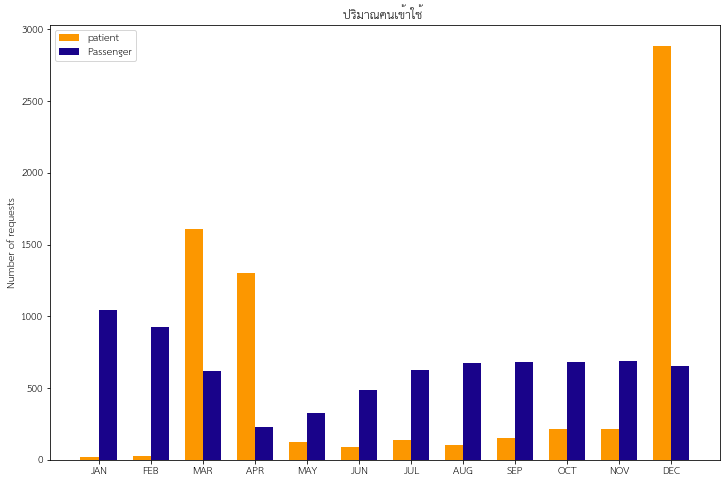

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,patient20, width, label='patient',color = '#fc9700')  #input ตัวแรกคือตำแหน่งในแนวแกนx(ตามด้วยx-width/2 คือกำหนดความกว้าง)
rects2 = ax.bar(x + width/2,list_pass20, width, label='Passenger',color = '#19038a') #ตามด้วยอีกกราฟที่ต้องการเปรียบเทียบ

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

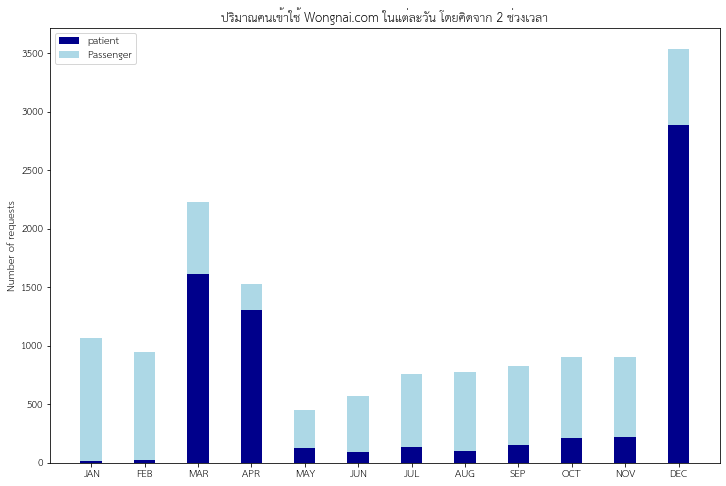

In [ ]:
width = 0.4      # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels,patient20, width,label='patient', color='darkblue')
ax.bar(labels,list_pass20, width,bottom=patient20,   #bottomคือการบอกว่าเริ่มจากตรงไหน
       label='Passenger',color='lightblue')

ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()


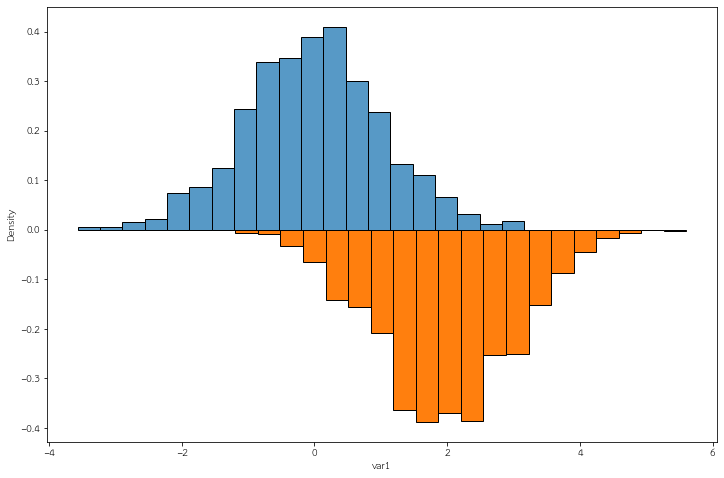

In [ ]:
# libraries
import numpy as np
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# dataframe
df = pd.DataFrame({
'var1': np.random.normal(size=1000),
'var2': np.random.normal(loc=2, size=1000) * -1
})

# Fig size
plt.rcParams["figure.figsize"]=12,8

# plot histogram chart for var1
sns.histplot(x=df.var1, stat="density", bins=20)

# plot histogram chart for var2
n_bins = 20
# get positions and heights of bars
heights, bins = np.histogram(df.var2, density=True, bins=n_bins) 
# multiply by -1 to reverse it
heights *= -1
bin_width = np.diff(bins)[0]
bin_pos =( bins[:-1] + bin_width / 2) * -1

# plot
plt.bar(bin_pos, heights, width=bin_width, edgecolor='black')

# show the graph
plt.show()